In [1]:
import functools

import graphcat.notebook
import numpy
import skimage.data

import imagecat.notebook

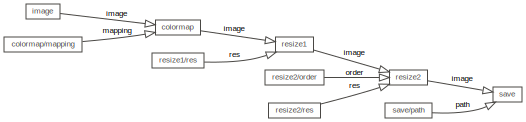

In [2]:
data = skimage.data.camera()
res = numpy.array([data.shape[1], data.shape[0]])
image = imagecat.data.from_array(data.astype(numpy.float16) / 255)

graph = graphcat.DynamicGraph()
task = graph.add_task("image", graphcat.constant(image))
task = task.add("colormap", imagecat.operator.color.colormap, params={"mapping": imagecat.color.brewer.linear_map("Blues")}, input="image")
task = task.add("resize1", imagecat.operator.transform.resize, params={"res": res // 4}, input="image")
task = task.add("resize2", imagecat.operator.transform.resize, params={"order": 0, "res": res}, input="image")
task = task.add("save", imagecat.operator.save, params={"path":"test.png"}, input="image")

graphcat.notebook.display(graph)

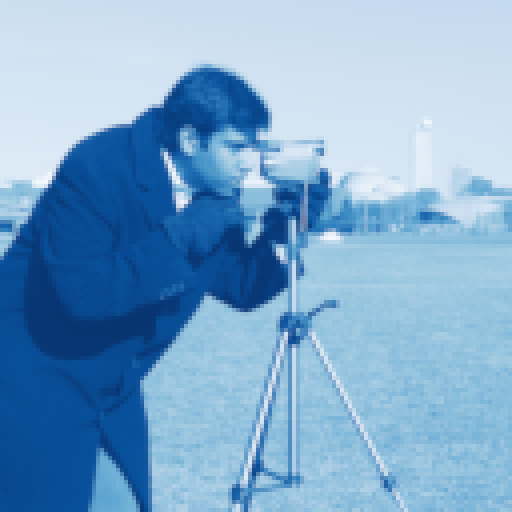

In [3]:
graph.output("resize2")

In [4]:
graph.output("save")